# DataFrame
## # 경찰청_연도별 사이버 범죄 통계 현황.csv
- 연도별 사이버 범죄 세부 유형별 발생, 검거 통계
- 2014년도부터 2020년도 자료
- 해킹, 서비스거부, 악성프로그램, 인터넷사기, 사이버금융범죄 등

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('C:/Users/sj123/Downloads/경찰청_연도별 사이버 범죄 통계.csv')
df.shape

(14, 35)

In [4]:
df.head()

,연도,구분,해킹(계정도용),해킹(단순침입),해킹(자료유출),해킹(자료훼손),서비스거부공격,악성프로그램(랜섬웨어),악성프로그램(기타),기타 정보통신망 침해형 범죄,...,사이버 음란물(일반음란물),사이버 음란물(아동음란물),사이버 음란물(불법촬영물유포),사이버 도박(스포츠토토),사이버 도박(경마 경륜 경정),사이버 도박(카지노),사이버 도박(기타),사이버 명예훼손(모욕),사이버 스토킹,기타 불법 컨텐츠
0,2020,발생건수,1067,1621,130,358,25,24,145,974,...,1366,2623,842.0,3222,332,429,1709,19388,42,204
1,2020,검거건수,117,217,46,168,10,0,81,272,...,987,2398,678.0,3154,315,382,1585,12638,39,126
2,2019,발생건수,751,1458,114,341,35,24,246,669,...,1769,756,165.0,3078,366,366,1536,16633,25,251
3,2019,검거건수,118,277,41,120,14,0,189,248,...,1436,589,139.0,3017,352,353,1440,11632,20,176
4,2018,발생건수,721,1003,114,340,20,33,86,571,...,2661,1172,NaN,1629,276,176,931,15926,60,208


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   연도                14 non-null     int64  
 1   구분                14 non-null     object 
 2   해킹(계정도용)          14 non-null     int64  
 3   해킹(단순침입)          14 non-null     int64  
 4   해킹(자료유출)          14 non-null     int64  
 5   해킹(자료훼손)          14 non-null     int64  
 6   서비스거부공격           14 non-null     int64  
 7   악성프로그램(랜섬웨어)      14 non-null     int64  
 8   악성프로그램(기타)        14 non-null     int64  
 9   기타 정보통신망 침해형 범죄   14 non-null     int64  
 10  사이버사기(직거래)        14 non-null     int64  
 11  사이버사기(쇼핑몰)        14 non-null     int64  
 12  사이버사기(게임)         14 non-null     int64  
 13  사이버사기(이메일 무역사기)   14 non-null     int64  
 14  사이버사기(기타)         14 non-null     int64  
 15  사이버금융범죄(피싱)       14 non-null     int64  
 16  사이버금융범죄(파밍)       14 non-null     int64  
 17 

### # 칼럼명 변경하기

In [6]:
def column_name(col):
    if '(' in col and ')' in col: # 문자열 col 안에 '(' 와 ')' 가 모두 포함되어 있다
        return col[col.find('(')+1:col.find(')')].strip() # +1 : 괄호 제외 괄호 안 첫 글자부터 시작해서 괄호까지 슬라이싱
    else:
        return col.strip() # 괄호 없을 때 그냥 컬럼 전체를 리턴 (앞뒤 공백만 제거)

df.columns = [column_name(col) for col in df.columns]
df.columns

Index(['연도', '구분', '계정도용', '단순침입', '자료유출', '자료훼손', '서비스거부공격', '랜섬웨어', '기타',
       '기타 정보통신망 침해형 범죄', '직거래', '쇼핑몰', '게임', '이메일 무역사기', '기타', '피싱', '파밍',
       '스미싱', '메모리해킹', '몸캠피싱', '메신저이용사기', '기타', '개인위치정보 침해', '사이버저작권침해',
       '기타 정보통신망 이용형 범죄', '일반음란물', '아동음란물', '불법촬영물유포', '스포츠토토', '경마 경륜 경정',
       '카지노', '기타', '모욕', '사이버 스토킹', '기타 불법 컨텐츠'],
      dtype='object')

In [7]:
# 1. '기타'라는 이름의 컬럼 추출
etc = [col for col in df.columns if col == '기타']

# 2. 합친 새 컬럼 생성
df['기타'] = df[etc].sum(axis=1)

# 3. 기존 '기타' 컬럼들 삭제
df.drop(columns=etc, inplace=True)

In [8]:
df.rename(columns={'기타 정보통신망 침해형 범죄': '정보통신망_침해형'}, inplace=True)
df.rename(columns={'기타 정보통신망 이용형 범죄': '정보통신망_이용형'}, inplace=True)
df.rename(columns={'기타 불법 컨텐츠': '불법컨텐츠'}, inplace=True)

In [9]:
df.columns

Index(['연도', '구분', '계정도용', '단순침입', '자료유출', '자료훼손', '서비스거부공격', '랜섬웨어',
       '정보통신망_침해형', '직거래', '쇼핑몰', '게임', '이메일 무역사기', '피싱', '파밍', '스미싱', '메모리해킹',
       '몸캠피싱', '메신저이용사기', '개인위치정보 침해', '사이버저작권침해', '정보통신망_이용형', '일반음란물',
       '아동음란물', '불법촬영물유포', '스포츠토토', '경마 경륜 경정', '카지노', '모욕', '사이버 스토킹',
       '불법컨텐츠'],
      dtype='object')

In [10]:
df.shape

(14, 31)

## 연도 

In [12]:
# '구분' 기준으로 발생건수/검거건수 분리
df_발생 = df[df['구분'] == '발생건수'].copy()
df_검거 = df[df['구분'] == '검거건수'].copy()

# '구분' 컬럼 제거
df_발생 = df_발생.drop(columns=['구분'])
df_검거 = df_검거.drop(columns=['구분'])

# 발생건수와 검거건수를 연도 기준으로 정렬
df_발생 = df_발생.sort_values(by='연도')
df_검거 = df_검거.sort_values(by='연도')

In [13]:
# 범죄 유형 컬럼만 추출
범죄유형_컬럼 = df_발생.columns[1:]

# 검거율 계산
df_검거율 = df_발생.copy()
for col in 범죄유형_컬럼:
    df_검거율[col] = df_검거[col] / df_발생[col] * 100

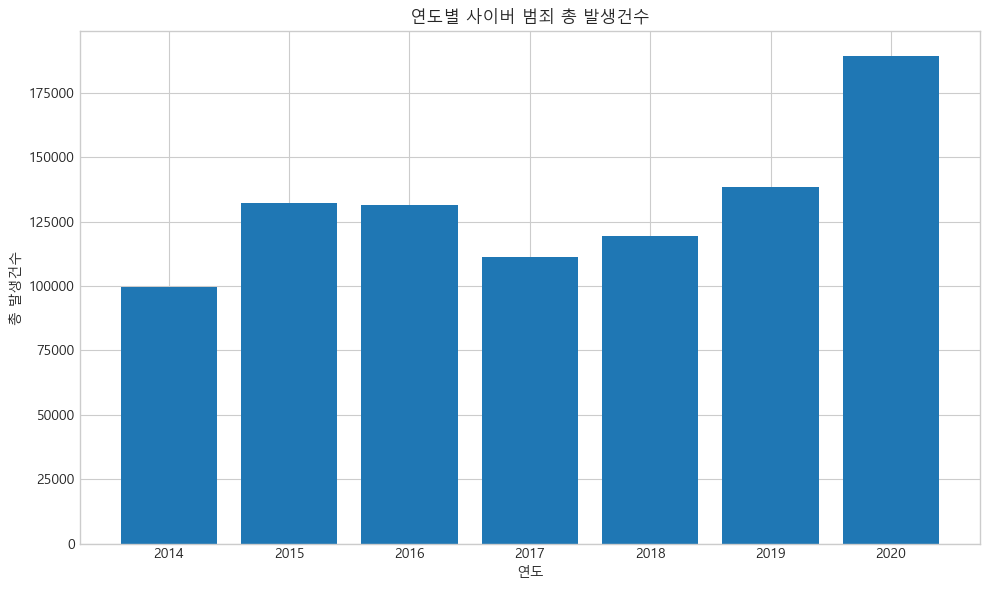

In [14]:
# 연도별 총합 계산
df_발생['총합'] = df_발생[범죄유형_컬럼].sum(axis=1)

# 막대그래프
plt.figure(figsize=(10, 6))
plt.bar(df_발생['연도'], df_발생['총합'])
plt.title('연도별 사이버 범죄 총 발생건수')
plt.xlabel('연도')
plt.ylabel('총 발생건수')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 총합 컬럼 생성
df['총합'] = df[범죄유형_컬럼].sum(axis=1)

# 발생/검거 데이터 분리
df_발생 = df[df['구분'] == '발생건수'].copy()
df_검거 = df[df['구분'] == '검거건수'].copy()

# 총합 기준 검거율 계산
검거율 = (df_검거['총합'].values / df_발생['총합'].values * 100).round(2)
검거율

array([68.75, 75.18, 76.22, 82.07, 83.49, 72.25, 65.36])

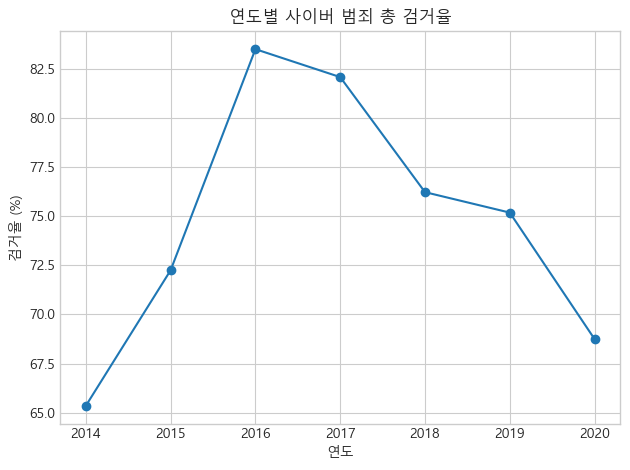

In [19]:
import matplotlib.pyplot as plt

plt.plot(df_발생['연도'], 검거율, marker='o')
plt.title('연도별 사이버 범죄 총 검거율')
plt.xlabel('연도')
plt.ylabel('검거율 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

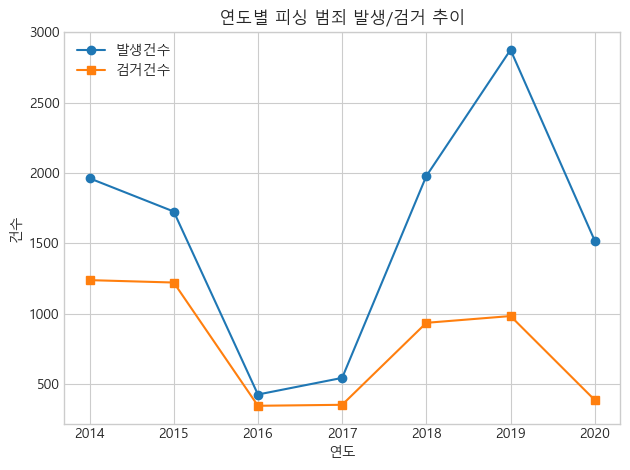

In [16]:
plt.plot(df_발생['연도'], df_발생['피싱'], marker='o', label='발생건수')
plt.plot(df_검거['연도'], df_검거['피싱'], marker='s', label='검거건수')
plt.title('연도별 피싱 범죄 발생/검거 추이')
plt.xlabel('연도')
plt.ylabel('건수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## # 범죄 유형별 평균 검거율 상위 5개

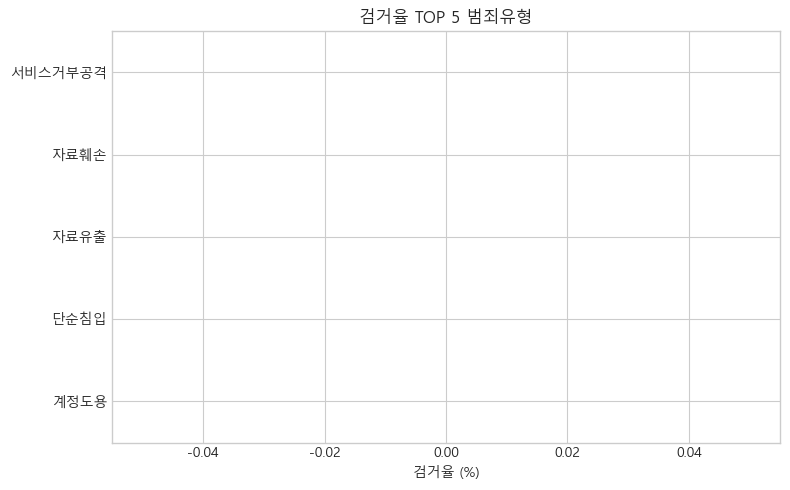

In [21]:
import matplotlib.pyplot as plt

top5 = 검거율_평균.head(5)

plt.figure(figsize=(8, 5))
top5.plot(kind='barh')
plt.title('검거율 TOP 5 범죄유형')
plt.xlabel('검거율 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## # 범죄 유형별 평균 검거율 하위 5개

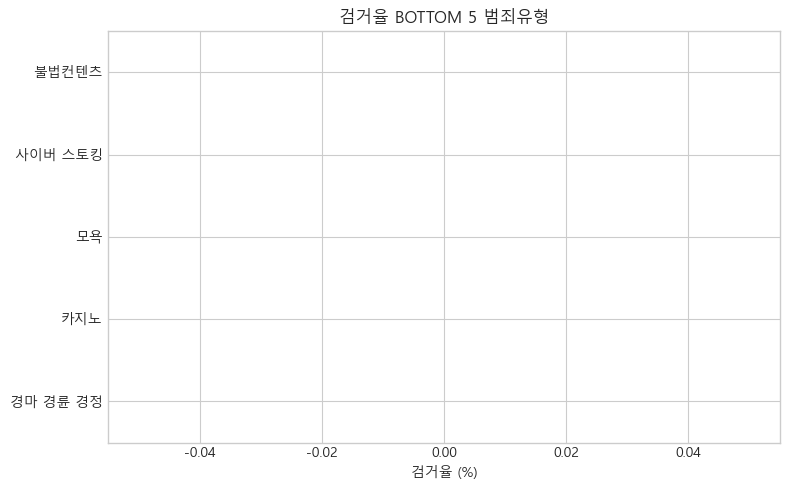

In [23]:
bottom5 = 검거율_평균.tail(5)

plt.figure(figsize=(8, 5))
bottom5.plot(kind='barh', color='orange')  # 구분감 있게 색상 바꾸는 것도 추천!
plt.title('검거율 BOTTOM 5 범죄유형')
plt.xlabel('검거율 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## # 범죄항목 연도별 검거율 변화

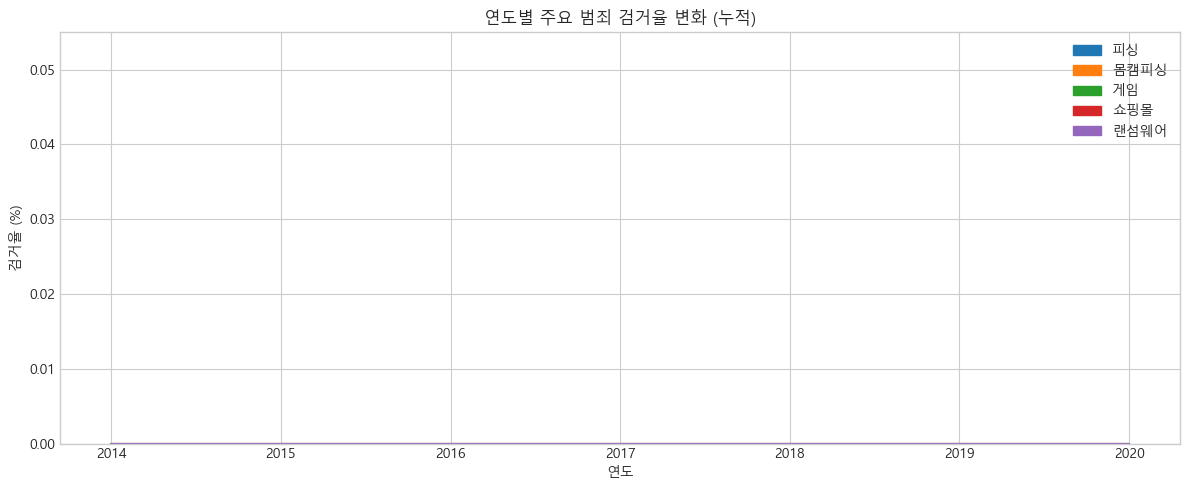

In [25]:
# 검거율 데이터프레임에서 일부 주요 범죄만 뽑기
선택유형 = ['피싱', '몸캠피싱', '게임', '쇼핑몰', '랜섬웨어']
df_area = df_검거율[['연도'] + 선택유형].copy()
df_area = df_area.sort_values(by='연도').set_index('연도')

# 누적 면적 그래프
df_area.plot.area(figsize=(12, 5), title='연도별 주요 범죄 검거율 변화 (누적)')
plt.ylabel('검거율 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## # 